В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/ML_Course/Data/cars/cars.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [5]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


Набір даних містить 100 строчок та 13 колоночок (ознак).  
Немає пропущених даних.  

In [6]:
df.select_dtypes(include = "number").shape[1], df.select_dtypes(include = "object").shape[1]

(8, 5)

Кількість ознак з числовим типом даних - 8, в тому числі Car_ID та Year.  
Кількість ознак з типом даних object - 5.     
Для зручності перетворимо тип даних колонки Car_ID на str, а також порахуємо вік автомобіля і додамо результат до датафрейму в якості нової ознаки, оскільки це може суттєво впливати на показники моделі.

In [7]:
for col in df.select_dtypes(include = "object").columns:
  print(f'{col}: {len(df[col].unique())}')

Brand: 11
Model: 58
Fuel_Type: 2
Transmission: 2
Owner_Type: 3


Серед 8 категоріальних колонок маємо:  
- 2 бінарних
- 2 мультикатегоріальних
- 1 з відношенням порядку (Owner_Type)

In [8]:
df['Car_ID'] = df['Car_ID'].astype('str')

In [9]:
current_year = 2024
df['car_age'] = current_year - df['Year']
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,6
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,5
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,7
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,4
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,8


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [10]:
df.select_dtypes(include = "number").columns, df.select_dtypes(include = "object").columns

(Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
        'Price', 'car_age'],
       dtype='object'),
 Index(['Car_ID', 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object'))

In [11]:
input_cols = ['car_age', 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
inputs = df[input_cols]

In [12]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, df.Price, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
inputs_train['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,41
Diesel,39


In [14]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
inputs_train['Fuel_Type_Code'] = df.Fuel_Type.map(fuel_codes)
inputs_test['Fuel_Type_Code'] = df.Fuel_Type.map(fuel_codes)

In [15]:
inputs_train.Transmission.value_counts()

,count
Transmission,
Automatic,49
Manual,31


In [16]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
inputs_train['Transmission_Code'] = df.Transmission.map(transmission_codes)
inputs_test['Transmission_Code'] = df.Transmission.map(transmission_codes)

In [17]:
enc = preprocessing.OneHotEncoder()
enc.fit(inputs_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [18]:
one_hot = enc.transform(inputs_train[['Brand']]).toarray()
inputs_train[enc.categories_[0]] = one_hot

In [19]:
one_hot = enc.transform(inputs_test[['Brand']]).toarray()
inputs_test[enc.categories_[0]] = one_hot

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(inputs_train[['Owner_Type']])

inputs_train['Owner_Type_Codes'] = ordenc.transform(inputs_train[['Owner_Type']])
inputs_test['Owner_Type_Codes'] = ordenc.transform(inputs_test[['Owner_Type']])

Для кодування змінної Model обираю метод Hash Encoding.  
Цей метод обраний тому що, на мою думку, він є найбільш корректним, оскільки змінна Model має дуже багато унікальних значень. Кількість спостережень кожного значення приблизно однакова, що робить не дієвим метод Frequency Encoding.  
Крім того, тестовий набір містить достатньо велику кількість категорій, які не зустрічаються в тестовому наборі. Через це також не корректно використовувати Target Encoding, оскільки значна кількість категорій в тестовому наборі отримає середнє значення колонки Price з усього трейн набору, що може значно вплинути на передбачення.

In [21]:
pip install category_encoders --quiet

In [22]:
from category_encoders import HashingEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
encoder = HashingEncoder(n_components=7, hash_method='blake2b')
encoder.fit(inputs_train[['Model']])

HashingEncoder(cols=['Model'], hash_method='blake2b', max_process=1,
               n_components=7)

In [24]:
inputs_train[['Model_col1', 'Model_col2', 'Model_col3', 'Model_col4', 'Model_col5', 'Model_col6', 'Model_col7']] = encoder.transform(inputs_train[['Model']])

In [25]:
inputs_test[['Model_col1', 'Model_col2', 'Model_col3', 'Model_col4', 'Model_col5', 'Model_col6', 'Model_col7']] = encoder.transform(inputs_test[['Model']])

In [26]:
pd.set_option('display.max_columns', 100)
display(inputs_train.head()), display(inputs_test.head())

,car_age,Brand,Model,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_col1,Model_col2,Model_col3,Model_col4,Model_col5,Model_col6,Model_col7
83,5,Volkswagen,T-Roc,Petrol,Automatic,Second,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,1,0,0
55,6,Audi,A5,Diesel,Automatic,First,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
26,6,Audi,A6,Petrol,Automatic,First,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1
54,7,Volkswagen,Vento,Petrol,Manual,Second,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0
19,7,Mercedes,GLC,Petrol,Automatic,Second,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0


,car_age,Brand,Model,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_col1,Model_col2,Model_col3,Model_col4,Model_col5,Model_col6,Model_col7
17,8,Audi,Q3,Petrol,Automatic,Second,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0
41,5,Hyundai,Santro,Petrol,Manual,Third,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1,0,0,0,0
92,7,Volkswagen,Vento,Petrol,Manual,Second,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0
14,4,Maruti,Ertiga,Petrol,Manual,First,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0
68,5,Ford,Aspire,Petrol,Manual,Third,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0,0


(None, None)

Очікуваний результат після трансформацій:

In [27]:
#pd.set_option('display.max_columns', 100)
#display(X_train.head()), display(X_test.head())

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [28]:
X_train = inputs_train.select_dtypes(include = "number")

In [29]:
corr_train = pd.concat([targets_train, X_train], axis=1).corr()
corr_train.head(10)

,Price,car_age,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_col1,Model_col2,Model_col3,Model_col4,Model_col5,Model_col6,Model_col7
Price,1.000000,0.233769,-0.083951,-0.638404,0.710561,0.849137,0.000979,-0.110782,0.680731,0.328858,0.477522,-0.004592,-0.209779,-0.263022,-0.178627,-0.249737,0.431606,-0.341815,-0.023778,-0.158742,-0.265537,-0.096026,-0.262609,-0.319196,0.376533,0.264013,0.007492,-0.075412
car_age,0.233769,1.000000,0.708525,-0.278559,0.392764,0.248442,0.278755,-0.248515,0.200603,0.256523,-0.202517,0.150454,0.037437,0.092099,-0.181669,-0.285094,0.115157,-0.248715,0.219346,-0.018255,0.014499,-0.130374,-0.097565,-0.097197,0.113488,0.064369,-0.008639,0.119614
Kilometers_Driven,-0.083951,0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.057410,0.011925,-0.041188,0.039447,-0.047452,0.108057,0.010494
Mileage,-0.638404,-0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,0.038145,0.184239,0.085114,-0.278282,-0.177588,0.040689,0.165172
Engine,0.710561,0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,-0.082224,-0.222697,-0.283335,0.423070,0.151770,-0.002256,-0.094595
Power,0.849137,0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,-0.090194,-0.247308,-0.283176,0.382003,0.271592,-0.035159,-0.107644
Seats,0.000979,0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.102619,0.172625,-0.094002,0.048441,-0.121205,0.060962,0.037727
Fuel_Type_Code,-0.110782,-0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,0.148165,0.026324,0.302015,-0.226954,0.171560,-0.161425,-0.208965
Transmission_Code,0.680731,0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.119148,-0.352971,-0.207712,0.287735,0.168569,-0.006625,-0.106354
Audi,0.328858,0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.053376,-0.133092,-0.103221,0.234267,-0.133092,-0.086066,0.065795


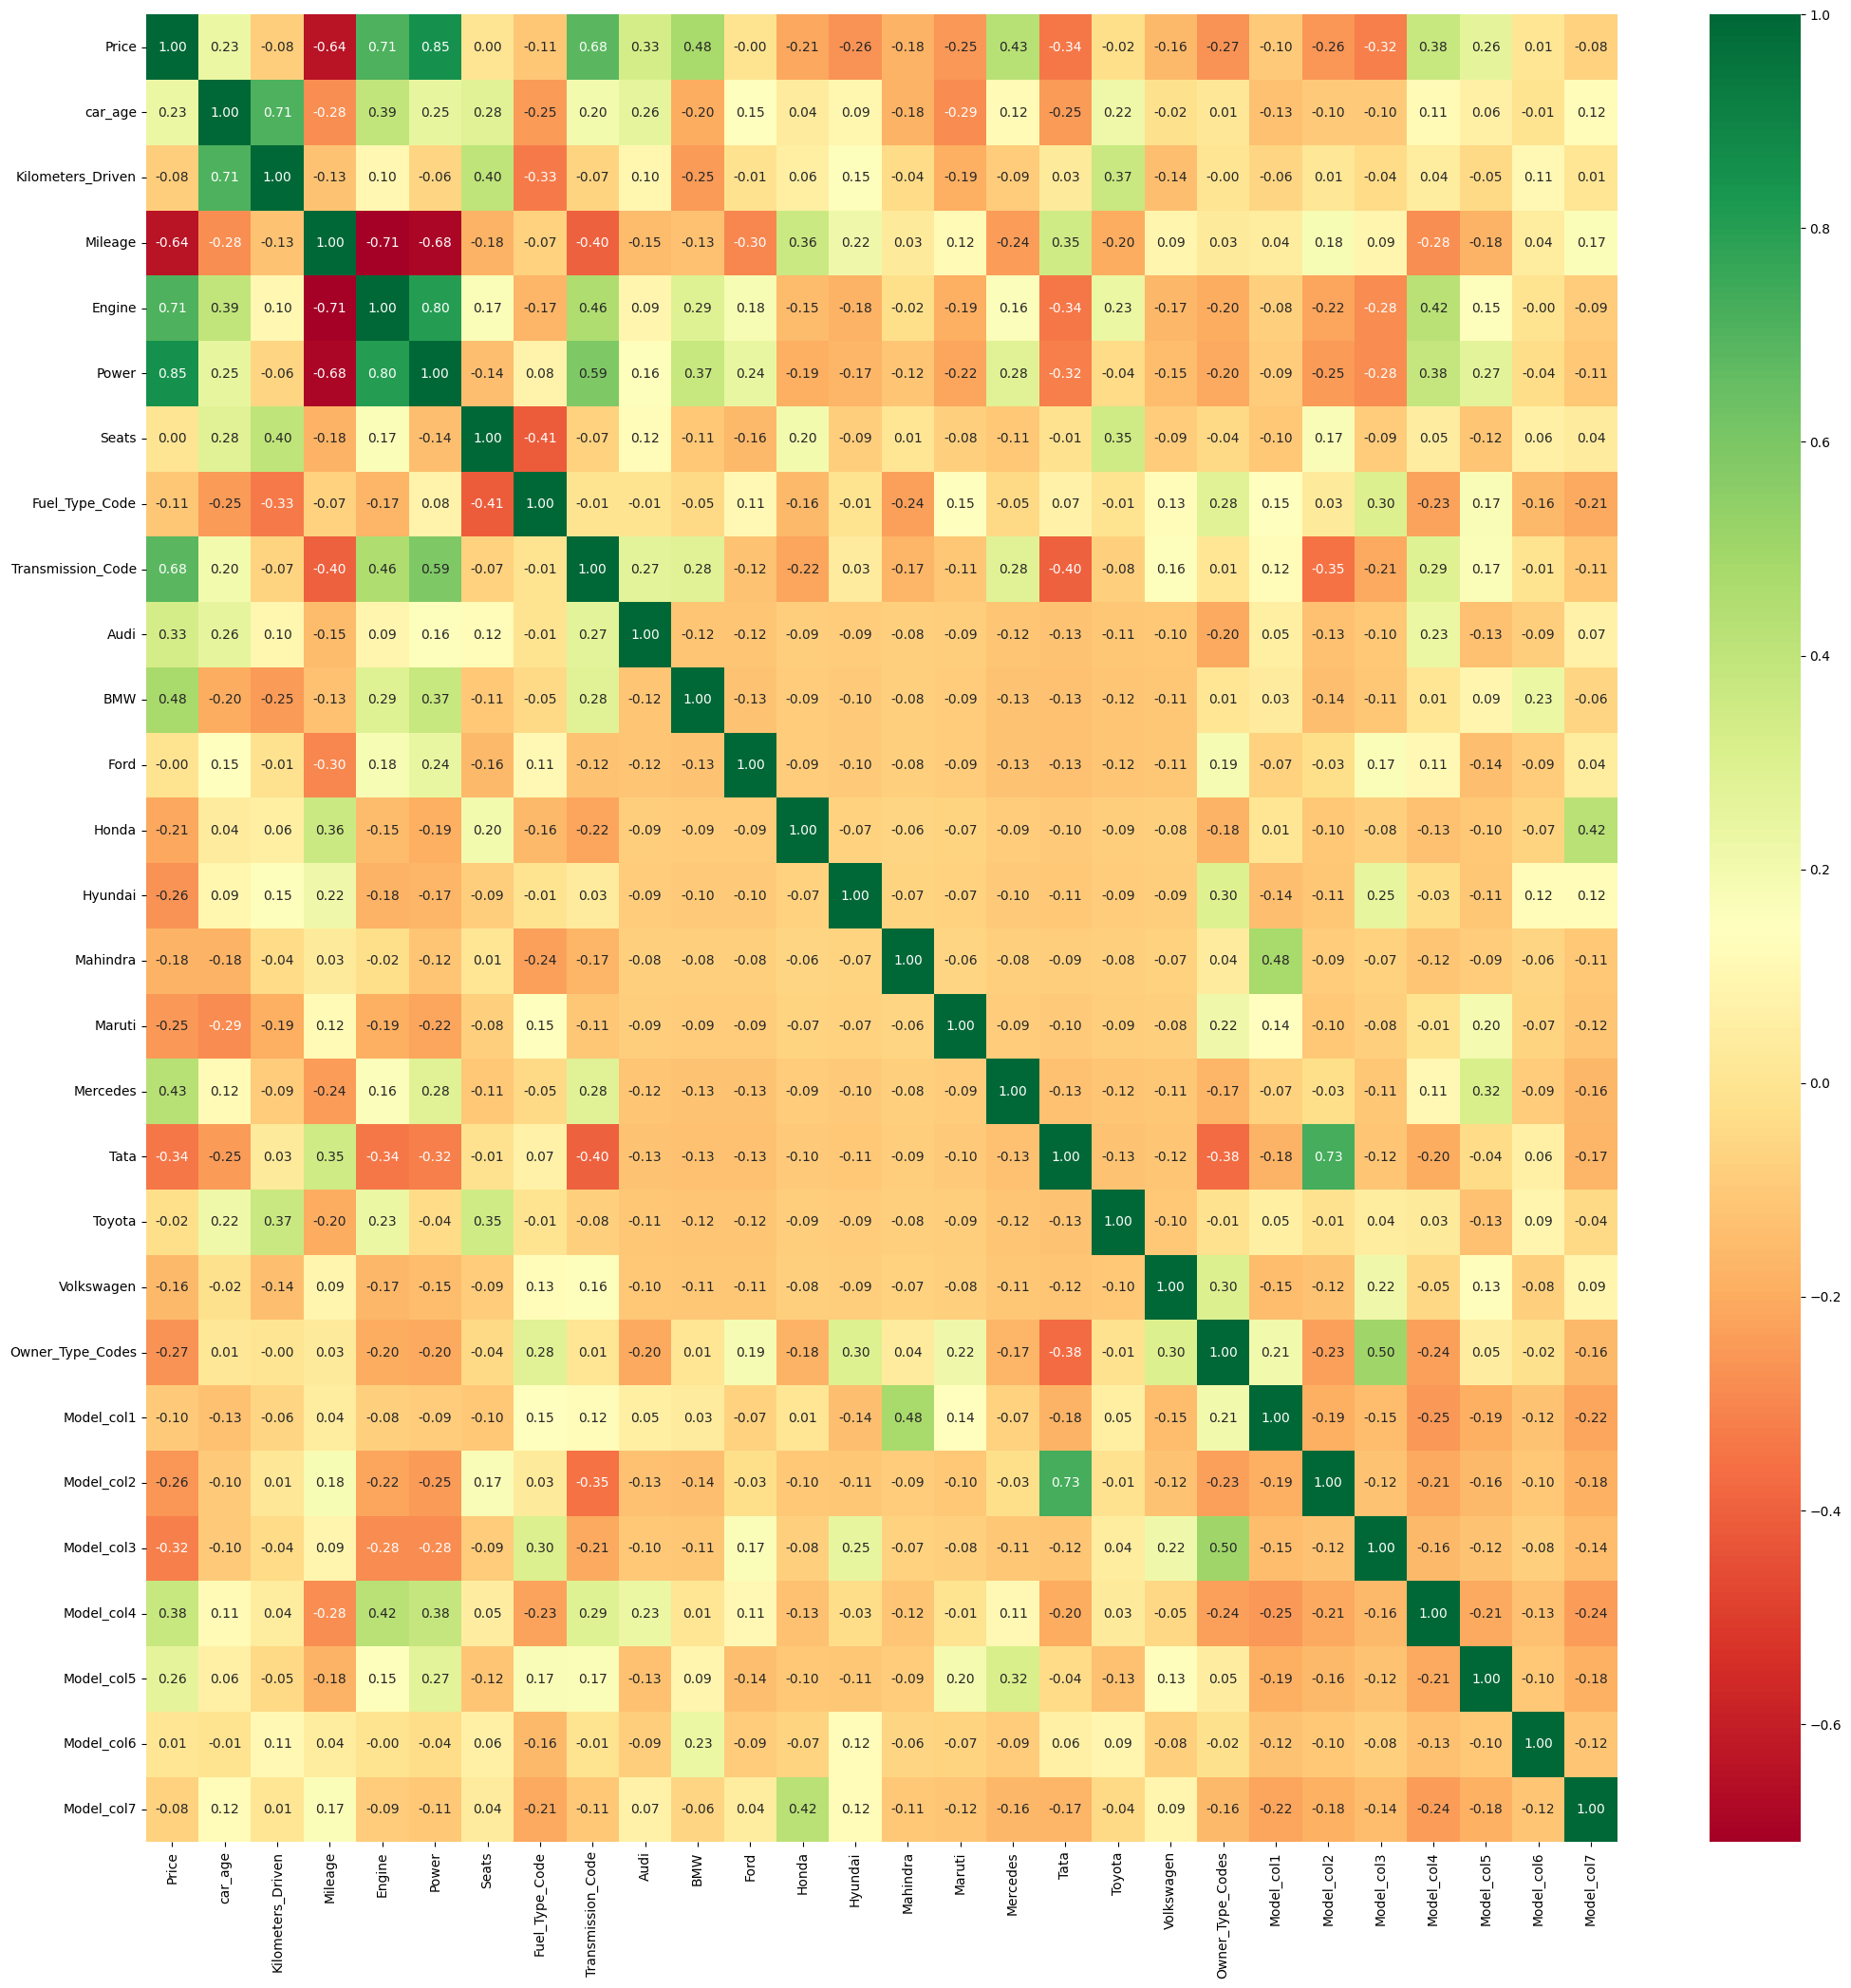

In [30]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_train, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

За результатами аналізу коефіцієнтів кореляції можемо відзначити, що значення коефіцієнтів більше 0.5 по модулю мають наступні фічі:  
- Mileage - 0.64 (від'ємна кореляція)  
- Engin - 0.71  
- Power - 0.85  
- Transmission_Code - 0.68  

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [31]:
X_test = inputs_test.select_dtypes(include = "number")

In [32]:
model = LinearRegression().fit(X_train, targets_train)

In [33]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
rmse_train = root_mean_squared_error(targets_train, predictions_train)
rmse_test = root_mean_squared_error(targets_test, predictions_test)

In [34]:
print(f'RMSE for train: {rmse_train}\nRMSE for test:{rmse_test}')

RMSE for train: 191334.72469970386
RMSE for test:311248.0491539596


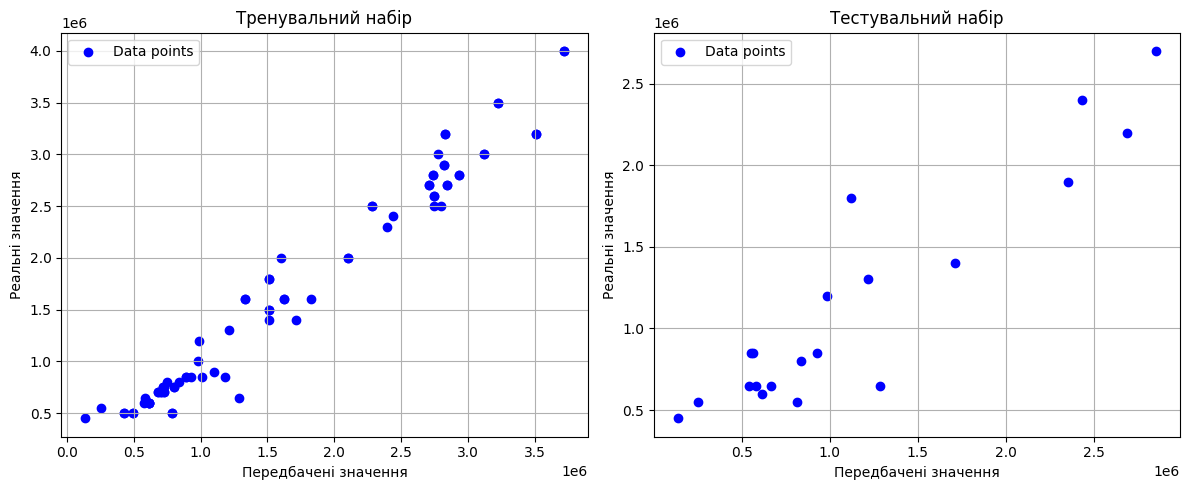

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(predictions_train, targets_train, color='blue', label='Data points')
axes[0].set_xlabel("Передбачені значення")
axes[0].set_ylabel("Реальні значення")
axes[0].set_title("Тренувальний набір")
axes[0].legend()
axes[0].grid()
axes[1].scatter(predictions_test, targets_test, color='blue', label='Data points')
axes[1].set_xlabel("Передбачені значення")
axes[1].set_ylabel("Реальні значення")
axes[1].set_title("Тестувальний набір")
axes[1].legend()
axes[1].grid()
plt.tight_layout()
plt.show();

**Висновок:**  
Значення кореневої середньоквадратичної помилки дуже високе для обох наборів даних. При цьому, якщо порівнювати між собою, то бачимо, що помилка на тренувальних даних значно нижча ніж помилка на тестових даних.  
Про це свідчать і графіки.  
На графіку для тренувальних даних розкид точок менший, лінійна залежність вгадується більш чітко.  
На графіку для тестових даних точки розкидани більш хаотично. Є навіть випадки, коли при збільшенні реальних значень Price передбачені дані зменшуються (лінія з 3 точок по середині графіку в діапазоні від 1.0 до 1.5 )

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [36]:
X_train.head(3)

,car_age,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_col1,Model_col2,Model_col3,Model_col4,Model_col5,Model_col6,Model_col7
83,5,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,1,0,0
55,6,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
26,6,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1


In [37]:
cols_for_scaler = ['car_age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
scaler = StandardScaler()
scaler.set_output(transform='pandas')

StandardScaler()

In [38]:
scaler.fit(X_train[cols_for_scaler])

StandardScaler()

In [39]:
scaled_inputs_train = scaler.transform(X_train[cols_for_scaler])
scaled_inputs_test = scaler.transform(X_test[cols_for_scaler])

In [40]:
cat_cols = ['Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes', 'Model_col1', 'Model_col2',
       'Model_col3', 'Model_col4', 'Model_col5', 'Model_col6', 'Model_col7']
categorical_data_train = X_train[cat_cols]
categorical_data_test = X_test[cat_cols]

In [41]:
X_train_scaled = pd.concat((scaled_inputs_train, categorical_data_train), axis=1)
X_test_scaled = pd.concat((scaled_inputs_test, categorical_data_test), axis=1)

In [42]:
model = LinearRegression().fit(X_train_scaled, targets_train)

In [43]:
predictions_train = model.predict(X_train_scaled)
predictions_test = model.predict(X_test_scaled)
rmse_train = root_mean_squared_error(targets_train, predictions_train)
rmse_test = root_mean_squared_error(targets_test, predictions_test)

In [44]:
print(f'RMSE for train: {rmse_train}\nRMSE for test:{rmse_test}')

RMSE for train: 191334.72469970377
RMSE for test:311248.04915395833


In [45]:
coefficients = model.coef_
intercept = model.intercept_
feature_names = model.feature_names_in_

df_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

df_coefficients = pd.concat([pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]}), df_coefficients])
df_coefficients

,Feature,Coefficient
0,Intercept,1.467970e+06
0,car_age,4.548159e+03
1,Kilometers_Driven,-1.034791e+05
2,Mileage,-1.312278e+05
3,Engine,-2.524368e+04
4,Power,4.265102e+05
5,Seats,4.440045e+03
6,Fuel_Type_Code,-3.112375e+05
7,Transmission_Code,2.977599e+05
8,Audi,7.719693e+05


**Висновок:**  
Після масштабування показники кореневої середньоквадратичної помилки не змінились, отже модель не покращилась.  
Відповідно до значень коефіцієнтів можемо визначити наступне.  
Найвищі за абсолютним значенням коефіцієнти:  
Power (зі знаком +)  
Fuel_Type_Code (зі знаком -)  
Transmission_Code (зі знаком +)  
Mileage (зі знаком -)  
Kilometers_Driven (зі знаком -)  
Audi (зі знаком +)  
BMW (зі знаком +)  
Mercedes (зі знаком +)  
З точки зору логічності впливу цих коефіцієнтів, можна сказати, що наступні фічі мають логічний вплив:  
- Power - чим більша потужність автомобілю, тим він дорожчий;  
- Fuel_Type_Code - тип пального може негативно впливати на вартість авто, оскільки в 2020 році в Індії запровадженно жорсткі норми викидів BS-VI. Дизельні автомобілі стали менш популярними через підвищену вартість виробництва двигунів, які відповідають новим екологічним стандартам. А також, через те, що різниця в ціні на дизель і бензин значно скоротилася, що зробило володіння дизельним автомобілем менш економічно вигідним;  
- Transmission_Code - автоматична коробка також є фактором, здорожчання авто, навіть в рамках однієї моделі;  
- Kilometers_Driven - зі збільшенням пробігу авто, його ціна зменшується;  
- Audi, BMW, Mercedes - є автомобілями преміум класу, що природнім чином збільшує їх вартість.  

Не логічним виглядає негативний вплив фічі Mileage, оскількі паливна ефективність зазвичай є важливим позитивним фактором на ринку автомобілів. Можливим поясненням такого ефекту може бути мультиколінеарність, тобто сильну кореляцію між змінною Mileage та іншими змінними. Звернувшись до теплової мапи, можемо побачити, що дана змінна дійсно має високий показник кореляції зі змінними Power та Engin. Можливо є сенс не включати цю змінну для тренування моделі, враховуючи, що ці фічі мають вищий показник кореляції з цільовою змінною.  
Крім того, не логічним може виглядати і негативний вплив Engin, оскільки об'єм двигуна зазвичай позначається на збільшенні вартості авто. Проте, для ринку Індії більшим попитом користуються авто з меншим об'ємом двигуна через "економію", а також в Індії транспортні засоби з об'ємом двигуна понад 1500 cc підпадають під вищий податок. Це може негативно впливати на вартість таких авто на вторинному ринку.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [46]:
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)
model = sm.OLS(targets_train, X_train_const)
results = model.fit()
results.params

,0
const,1.189829e+06
car_age,4.548159e+03
Kilometers_Driven,-1.034791e+05
Mileage,-1.312278e+05
Engine,-2.524368e+04
Power,4.265102e+05
Seats,4.440045e+03
Fuel_Type_Code,-3.112375e+05
Transmission_Code,2.977599e+05
Audi,8.801355e+05


Отримані коефіцієнти дуже схожі на ті, що ми отримали раніше, проте маємо суттєву різницю в колоночках, що відповідають кодуванню фічі Models. Крім того, маємо різне значення для інтерсепт.

In [47]:
predictions_train_stats = results.predict(X_train_const)
predictions_test_stats = results.predict(X_test_const)

In [48]:
rmse_train = root_mean_squared_error(targets_train, predictions_train_stats)
rmse_test = root_mean_squared_error(targets_test, predictions_test_stats)

In [49]:
print(f'RMSE for train: {rmse_train}\nRMSE for test:{rmse_test}')

RMSE for train: 191334.72469970374
RMSE for test:311248.04915395856


Значення кореневої середньоквадратичної помилки не змінились.

In [50]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     60.91
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           4.05e-31
Time:                        21:14:02   Log-Likelihood:                -1086.5
No. Observations:                  80   AIC:                             2225.
Df Residuals:                      54   BIC:                             2287.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+06    7.8e+0

R2 - 0.966 - наша модель пояснює 96.6% варіацій у залежній змінній. Дуже високий показник. Означає, що модель гарно розуміє залежності між незалежними змінними і таргет змінною.  
Adj.R2 - 0.950 - також дуже високе значення  
Fстат - 60.91, Prob - 40.05е-31 - оскільки p_value дуже маленьке, можна сказати, що модель в цілому значуща, що означає, що наявні незалежні змінні дійсно впливають на таргет змінну.  
Log-правдоподібність -1086.5
AIC 2225
BIC 2287


Відповідно до звіту, стат значущими на рівні 0.05 є наступні фічі:  
- const - 0.000  
- Mileage - 0.025  
- Power - 0.000  
- Fuel_Type_Code - 0.002  
- Transmission_Code - 0.003  
- Audi - 0.000  
- BMW - 0.000  
- Hyundai - 0.000  
- Mahindra - 0.045  
- Maruti - 0.002  
- Mercedes - 0.000  
- Toyota - 0.000  
- Volkswagen - 0.017  
- Model_col4 - 0.001  
- Model_col5 - 0.000  
- Model_col7 - 0.000

Як бачимо, Mileage має статистично значущий вплив на таргет змінну, на відміну від Engin.


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [51]:
significant_columns = ['const', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Hyundai', 'Mahindra',
                       'Maruti', 'Mercedes', 'Toyota', 'Volkswagen', 'Model_col4', 'Model_col5', 'Model_col7']

In [52]:
X_train_const_signif = X_train_const[significant_columns]
X_test_const_signif = X_test_const[significant_columns]

In [53]:
model = sm.OLS(targets_train, X_train_const_signif)
results = model.fit()
results.params

,0
const,1.213356e+06
Mileage,-1.100946e+05
Power,3.934472e+05
Fuel_Type_Code,-2.052306e+05
Transmission_Code,2.938816e+05
Audi,9.380590e+05
BMW,1.087449e+06
Hyundai,-3.449276e+05
Mahindra,-1.952989e+05
Maruti,-2.323792e+05


In [54]:
predictions_train_stats_signif = results.predict(X_train_const_signif)
predictions_test_stats_signif = results.predict(X_test_const_signif)

In [55]:
rmse_train = root_mean_squared_error(targets_train, predictions_train_stats_signif)
rmse_test = root_mean_squared_error(targets_test, predictions_test_stats_signif)

In [56]:
print(f'RMSE for train: {rmse_train}\nRMSE for test:{rmse_test}')

RMSE for train: 208287.18439905008
RMSE for test:281548.68707790144


In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.50e-38
Time:                        21:14:02   Log-Likelihood:                -1093.2
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      64   BIC:                             2257.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.213e+06   8.66e+0

R2 - 0.956 - наша модель пояснює 95.6% варіацій у залежній змінній. Дуже високий показник. Означає, що модель гарно розуміє залежності між незалежними змінними і таргет змінною.  
Adj.R2 - 0.950 - також дуже високе значення  
Fстат - 100.9, Prob - 1.5е-38 - значення Fстатистики вище ніж в попередньої моделі, p_value дуже маленьке. Модель в цілому значуща.  
Log-правдоподібність -1093.2 - значення є меншим за аналогічне в попередній моделі
AIC 2218 - значення є меншим за аналогічне в попередній моделі
BIC 2257 - значення є меншим за аналогічне в попередній моделі

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [58]:
columns = ['const', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
                       'Maruti', 'Mercedes', 'Toyota', 'Volkswagen', 'Owner_Type_Codes', 'Model_col4', 'Model_col5', 'Model_col7']

In [59]:
X_train_const_signif_less25 = X_train_const[columns]
X_test_const_signif_less25 = X_test_const[columns]

In [60]:
model = sm.OLS(targets_train, X_train_const_signif_less25)
results = model.fit()
results.params

,0
const,1.202141e+06
Mileage,-1.070991e+05
Power,3.994306e+05
Fuel_Type_Code,-2.122527e+05
Transmission_Code,2.931034e+05
Audi,9.234742e+05
BMW,1.054978e+06
Ford,-3.595469e+04
Hyundai,-4.058787e+05
Mahindra,-2.189200e+05


In [61]:
predictions_train_stats_signif_less25 = results.predict(X_train_const_signif_less25)
predictions_test_stats_signif_less25 = results.predict(X_test_const_signif_less25)

In [62]:
rmse_train = root_mean_squared_error(targets_train, predictions_train_stats_signif_less25)
rmse_test = root_mean_squared_error(targets_test, predictions_test_stats_signif_less25)

In [63]:
print(f'RMSE for train: {rmse_train}\nRMSE for test:{rmse_test}')

RMSE for train: 207225.1833451272
RMSE for test:293009.135678509


In [64]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     87.13
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.11e-36
Time:                        21:14:03   Log-Likelihood:                -1092.8
No. Observations:                  80   AIC:                             2222.
Df Residuals:                      62   BIC:                             2265.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.202e+06   1.04e+0

R2 - 0.960 - наша модель пояснює 96.0% варіацій у залежній змінній. Дуже високий показник. Означає, що модель гарно розуміє залежності між незалежними змінними і таргет змінною.  
Adj.R2 - 0.950 - також дуже високе значення  
Обидва значення R2 та Adj.R2 майже не відрізняються в усіх трьох моделей.

Fстат - 87.13, Prob - 1.11е-36 - Модель в цілому значуща.  
Log-правдоподібність -1092.8
AIC 2222
BIC 2265

##Висновок:  
За R² та Adj R² всі три моделі майже однакові.
За F-stat та Prob модель, натренована на змінних, коефіцієнти яких мають значущість на рівні 0.05, найкраща (високе F-stat та найменше p-value).
За AIC та BIC модель,натренована на змінних, коефіцієнти яких мають значущість на рівні 0.05, також найкраща, оскільки має найнижчі значення.  

Якщо не зважати на значення RMSE в усіх моделях для обох наборів даних, що є дуже високим, то саме модель,натреновану на змінних, коефіцієнти яких мають значущість на рівні 0.05, я би використовувала.